C:\Users\15PRO\AppData\Local\Temp\ipykernel_19152\1702869653.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


方差贡献率 (协方差矩阵 S): [9.14833550e+01 6.53419156e+00 1.46938286e+00 2.58923648e-01
 1.19068471e-01 7.06453197e-02 3.90914187e-02 1.14275222e-02
 7.58767548e-03 3.51808581e-03 2.80840615e-03]
方差贡献率 (相关系数矩阵 R): [55.02865759 18.96025638 10.33459889  6.96702475  3.25625926  2.33782711
  1.12918089  0.98164227  0.53122443  0.28944662  0.1838818 ]


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

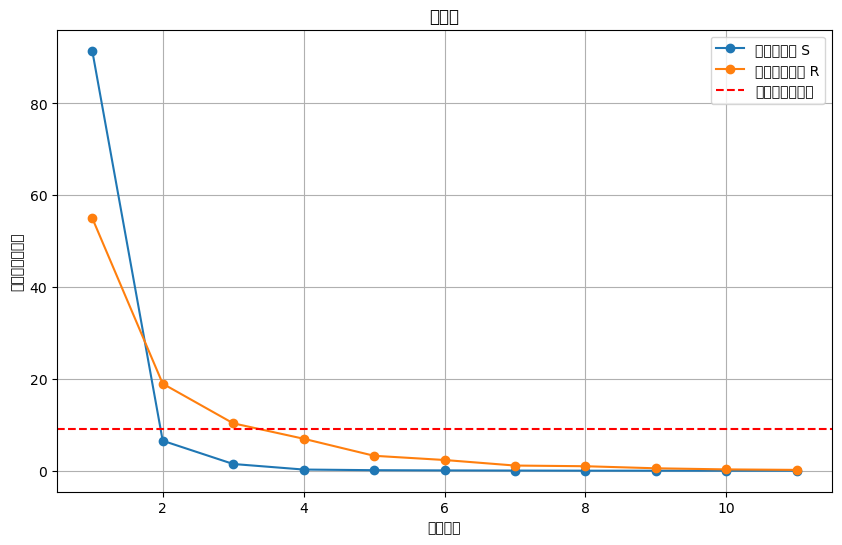

相关系数矩阵 R 的主成分载荷：
           y1        y2        y3        y4        y5        y6        y7  \
0  -0.329498 -0.352658 -0.390729 -0.380440 -0.231314 -0.360700  0.089024   
1   0.078057 -0.198223 -0.056332 -0.052182 -0.535101 -0.240540 -0.030426   
2   0.096284  0.107088  0.114878  0.136502  0.002632  0.115347  0.781246   
3  -0.277231 -0.225471 -0.141107 -0.011985 -0.063934  0.135166  0.560099   
4  -0.781426  0.014339  0.001904  0.168981  0.113990  0.213833 -0.183804   
5  -0.396733  0.579588  0.263039  0.087002 -0.293921 -0.214098  0.080410   
6   0.065671 -0.022429 -0.047744  0.611366 -0.490749 -0.088437 -0.104081   
7   0.052613  0.437526  0.163955 -0.559643 -0.155612 -0.180001  0.035395   
8   0.048092 -0.161722  0.294336 -0.197801 -0.523929  0.611651 -0.066948   
9   0.072694 -0.076947  0.156004  0.258497  0.028435 -0.473800  0.101140   
10  0.128489  0.462493 -0.775709  0.068749 -0.127761  0.223771  0.006819   

          y8        y9       y10       y11  
0   0.260582  0.311537  

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 加载数据
file_path = "C:/Users/15PRO/table7_2.txt"
data = pd.read_csv(file_path, delim_whitespace=True)

# 2. 标准化数据
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# 3. PCA 分析
# 使用协方差矩阵（S）
pca_s = PCA()
pca_s.fit(data)

# 使用相关系数矩阵（R）
pca_r = PCA()
pca_r.fit(data_standardized)

# 4. 解释方差
explained_variance_s = pca_s.explained_variance_ratio_ * 100
explained_variance_r = pca_r.explained_variance_ratio_ * 100

# 打印方差贡献率
print("方差贡献率 (协方差矩阵 S):", explained_variance_s)
print("方差贡献率 (相关系数矩阵 R):", explained_variance_r)

# 5. 绘制碎石图
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_s) + 1), explained_variance_s, marker='o', label="协方差矩阵 S")
plt.plot(range(1, len(explained_variance_r) + 1), explained_variance_r, marker='o', label="相关系数矩阵 R")
plt.axhline(y=100 / len(data.columns), color='r', linestyle='--', label="平均特征值阈值")
plt.title("碎石图")
plt.xlabel("主成分数")
plt.ylabel("方差解释百分比")
plt.legend()
plt.grid()
plt.show()

# 6. 主成分解释
components_r = pd.DataFrame(pca_r.components_, columns=data.columns)
print("相关系数矩阵 R 的主成分载荷：\n", components_r)
